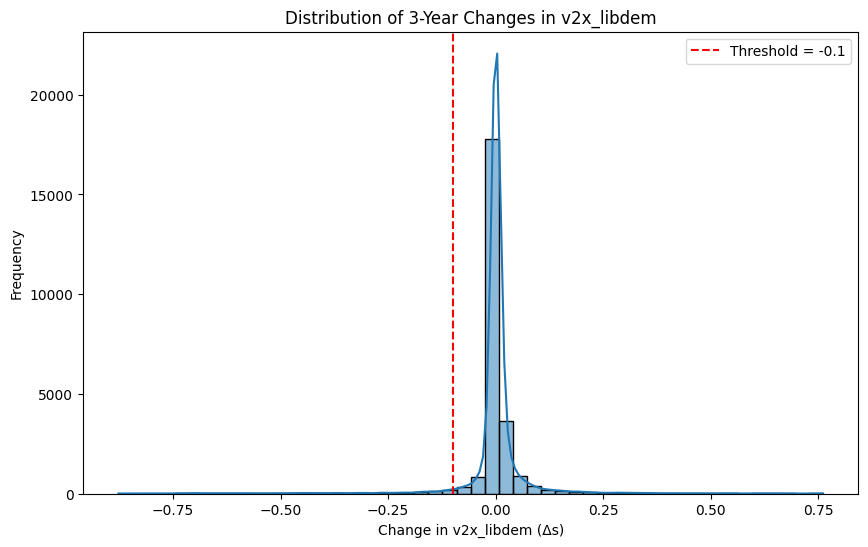

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pl.read_parquet("../vdemData/V-Dem-CY-Full+Others-v15.parquet")

# Calculate the 3-year future value and the change
df = df.with_columns(pl.col("v2x_libdem").shift(-3).alias("v2x_libdem_future"))
df = df.with_columns(
    (pl.col("v2x_libdem_future") - pl.col("v2x_libdem")).alias("delta")
)

# Convert to Pandas for plotting
pdf = df.select("delta").drop_nulls().to_pandas()

# Plot the distribution of changes
plt.figure(figsize=(10, 6))
sns.histplot(pdf["delta"], bins=50, kde=True)
plt.axvline(x=-0.1, color="red", linestyle="--", label="Threshold = -0.1")
plt.xlabel("Change in v2x_libdem (Δs)")
plt.ylabel("Frequency")
plt.title("Distribution of 3-Year Changes in v2x_libdem")
plt.legend()
plt.show()

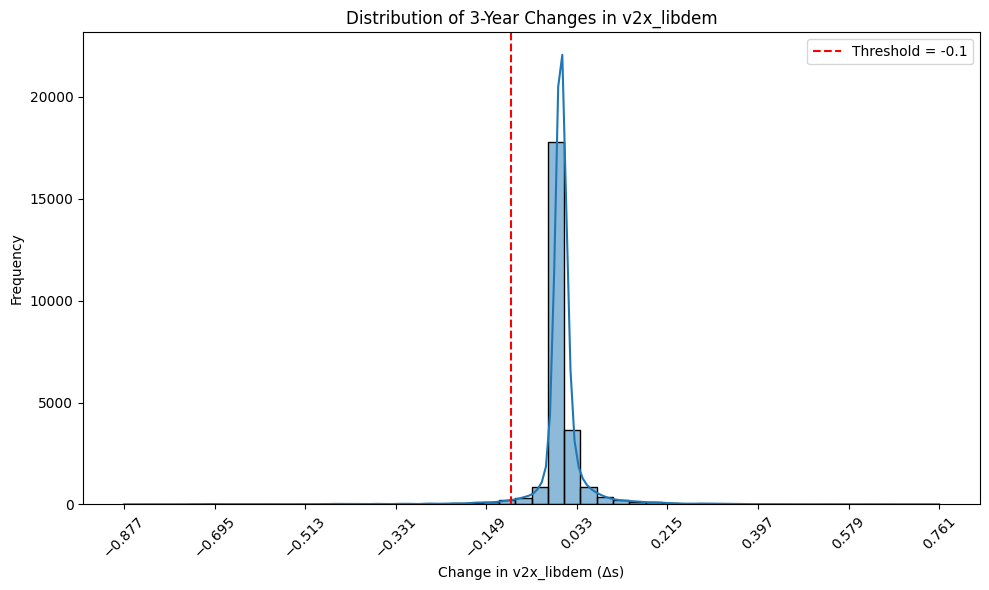

In [4]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pl.read_parquet("../vdemData/V-Dem-CY-Full+Others-v15.parquet")

# Calculate the 3-year future value and the change (Δs)
df = df.with_columns(pl.col("v2x_libdem").shift(-3).alias("v2x_libdem_future"))
df = df.with_columns(
    (pl.col("v2x_libdem_future") - pl.col("v2x_libdem")).alias("delta")
)

# Convert to Pandas for plotting
pdf = df.select("delta").drop_nulls().to_pandas()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(pdf["delta"], bins=50, kde=True)
plt.axvline(x=-0.1, color="red", linestyle="--", label="Threshold = -0.1")

# Define custom ticks based on the data range
delta_min = pdf["delta"].min()
delta_max = pdf["delta"].max()
# For example, create 10 ticks between the min and max
custom_ticks = np.linspace(delta_min, delta_max, 10)
plt.xticks(custom_ticks, rotation=45)  # rotate tick labels for better readability

plt.xlabel("Change in v2x_libdem (Δs)")
plt.ylabel("Frequency")
plt.title("Distribution of 3-Year Changes in v2x_libdem")
plt.legend()
plt.tight_layout()  # ensure layout fits well on the figure
plt.savefig("../writeup/plots/v2x_libdem_delta_over_3", dpi=300)
plt.show()